# Instroduction:

Diabetes is a chronic disease that affects millions of people worldwide, and it can lead to a range of serious complications if not managed properly.
By developing accurate predictive models for diabetes, healthcare providers can identify patients who are at high risk for developing complications or 
experiencing adverse health outcomes, and intervene early to prevent these outcomes.

Early identification of high-risk patients: By using predictive models, healthcare providers can identify patients who are at high risk for developing
complications such as kidney disease, neuropathy, or retinopathy, and intervene early to prevent or delay these complications.

More personalized care: Predictive models can help healthcare providers tailor their treatment plans to the specific needs of each patient, taking into 
account their individual risk factors, medical history, and other relevant factors.

Reduced healthcare costs: By identifying high-risk patients early and intervening to prevent complications, healthcare providers can reduce the overall
cost of care for diabetic patients.

Improved patient outcomes: By using predictive models to identify high-risk patients and intervene early, healthcare providers can improve patient outcomes
and quality of life.

Overall, studying predictive models for diabetic patients can help healthcare providers provide more effective, personalized care, and ultimately improve
patient outcomes while reducing healthcare costs

We aim to find possible correlation between 
The dataset used for the project can be found on the following web address: 
https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset

We have used the second of the 3 files for the purpose of this project. It has been cleaned and wrangled from another data file which can be found on the following web address: 
https://www.kaggle.com/cdc/behavioral-risk-factor-surveillance-system
This dataset was created using the annual telephone survey conducted by the Center for Disease Control and Prevention under The Behavioral Risk Factor Surveillance System (BRFSS) program. 

Finally, we adapted the dataset and publiched it online using GitHub. This is the dataset we read in our project. It can be found here:
https://drive.google.com/u/0/uc?id=1OAZCpZGdFPy70ll_Fo2ow5dpaM1sG_47&amp;export=download

# !!! Describe the dataset with the file we use: what factors, what cols involve? each cols means what
eg: 
AnyHealthcare
Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no 1 = yes
CholCheck: 1 = yes cholesterol check in 5 years
# !!!Give a More detail question: how does a connection of factors such as Age, BMI, Smoking habits, 
Income effect a non-diabetic person's chances of acquiring type-2 diabetes?

# Method for predict the diabetes patitents with several exploratory variables
    
While there may be numerous methods to conduct such an analysis, we find that a predictive classification model would suit best for our purpose of the research for two reasons: 
    reason 1: our target is to identify a categorical variable
    reason 2: a relatively simple algorithm to implement, since it only requires calculating distances between data points and selecting the k-nearest neighbors. Following the overall steps we done with classification. 

1. we run some preliminary analysis to select the factors in raw dataset, identify the potential predictors to build our predictive classification model
2. in order to build a good-quality classification model, we split the data into training dataset and testing dataset, which can be use to test the quality of overall classifier
/// only preprocess the training dataset


3. Then we should tune on our training dataset by cross-validation. The classifier need to pick a K value to maximize the accuracy. Thus we choose to use cross-validation. If we just split the tranining data once to evaluate, the K maybe strongly depends on the specific valiadation and sub-training dataset, which lead to be overfitting or underfitting 
4. In R, we can use the vfold_cv function to conduct cross-validation. To utilize this function, we need to  indicate the number of folds (v) and the categorical variable.
5. Generate a new model specification for K-nearest neighbor but instead of defining a value for the K, using function tune()
6. Create a workflow() analysis that put fruit_recipe and new knn_tune model specification.
7. Plot the line diagram which can find different K with different accuracy. In this case, we should roughly optiminal accuracy but not too expensive for calculating (not too large);  does not change much if you change KK to a nearby value

8. Then put this K into our best fit classifier, training the model and using the test dataset to evaluate the predictive model.
9. We use the test data set to evaluate the best K classifier accuracy and answer the predictive question:...


Frist, We download the data from the url and read in Jupyter notebook.

In [2]:
library(tidyverse)
library(repr)
library(tidymodels)
library(GGally)
library(ISLR)
library(infer)
library(cowplot)
#library(corrplot)
#options(repr.matrix.max.rows = 6)
#source('tests.R')
#source('cleanup.R')

url <- "https://drive.google.com/u/0/uc?id=1OAZCpZGdFPy70ll_Fo2ow5dpaM1sG_47&amp;export=download"
diabetes_data <- read_csv(url)

summary(diabetes_data)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

 Diabetes_binary     HighBP          HighChol        CholCheck     
 Min.   :0.0     Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.0     1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:1.0000  
 Median :0.5     Median :1.0000   Median :1.0000   Median :1.0000  
 Mean   :0.5     Mean   :0.5635   Mean   :0.5257   Mean   :0.9753  
 3rd Qu.:1.0     3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:1.0000  
 Max.   :1.0     Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
      BMI            Smoker           Stroke        HeartDiseaseorAttack
 Min.   :12.00   Min.   :0.0000   Min.   :0.00000   Min.   :0.0000      
 1st Qu.:25.00   1st Qu.:0.0000   1st Qu.:0.00000   1st Qu.:0.0000      
 Median :29.00   Median :0.0000   Median :0.00000   Median :0.0000      
 Mean   :29.86   Mean   :0.4753   Mean   :0.06217   Mean   :0.1478      
 3rd Qu.:33.00   3rd Qu.:1.0000   3rd Qu.:0.00000   3rd Qu.:0.0000      
 Max.   :98.00   Max.   :1.0000   Max.   :1.00000   Max.   :1.0000      
  PhysActivit

In [4]:
# make more readable, slice the data
slice(diabetes_data, 1:10)

Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,⋯,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,1,0,1,26,0,0,0,1,0,⋯,1,0,3,5,30,0,1,4,6,8
0,1,1,1,26,1,1,0,0,1,⋯,1,0,3,0,0,0,1,12,6,8
0,0,0,1,26,0,0,0,1,1,⋯,1,0,1,0,10,0,1,13,6,8
0,1,1,1,28,1,0,0,1,1,⋯,1,0,3,0,3,0,1,11,6,8
0,0,0,1,29,1,0,0,1,1,⋯,1,0,2,0,0,0,0,8,5,8
0,0,0,1,18,0,0,0,1,1,⋯,0,0,2,7,0,0,0,1,4,7
0,0,1,1,26,1,0,0,1,1,⋯,1,0,1,0,0,0,1,13,5,6
0,0,0,1,31,1,0,0,0,1,⋯,1,0,4,0,0,0,1,6,4,3
0,0,0,1,32,0,0,0,1,1,⋯,1,0,3,0,0,0,0,3,6,8


# Exploratory data analysis to identify the potential predictors


Since whole dataset contain 21 explanatory variables, based on our KNN classification, we filter the irrelevant factors and contain potential exoloratory variables to build our classifer. 


First, we select mutate the Diabetes_binary as a categorical variable;
Then we seperate the numerical and logical explanatory variables and analyze those respectively
Slice first 10 rows to make the dataset more readable

In [3]:

diabetes_numerical_data <- diabetes_data |>
    mutate(Diabetes_binary = as.factor(Diabetes_binary)) |>
    select(-Smoker,
           -PhysActivity,
          -Veggies,
          -HvyAlcoholConsump, -AnyHealthcare, -NoDocbcCost, 
          -DiffWalk,
          -Sex,-HighBP, -HighChol, -CholCheck,
          -Stroke,-HeartDiseaseorAttack, -Fruits) |>
      summarize(across(Diabetes_binary:Income,na.rm =TRUE)) 

# select(BMI,Age,Income,Smoker,Diabetes_binary)

slice(diabetes_numerical_data, 1:10)

diabetes_logical_data <- diabetes_data |>
    mutate(Diabetes_binary = as.factor(Diabetes_binary)) |>
    select(Smoker,
           PhysActivity,
          Veggies,
          HvyAlcoholConsump, AnyHealthcare, NoDocbcCost, 
          DiffWalk,
          Sex, HighBP, HighChol, CholCheck,
          Stroke, HeartDiseaseorAttack, Fruits, Diabetes_binary) |>
    summarize(across(Smoker:Diabetes_binary,na.rm =TRUE)) 
     

slice(diabetes_logical_data,1:10)

Diabetes_binary,BMI,GenHlth,MentHlth,PhysHlth,Age,Education,Income
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,26,3,5,30,4,6,8
0,26,3,0,0,12,6,8
0,26,1,0,10,13,6,8
0,28,3,0,3,11,6,8
0,29,2,0,0,8,5,8
0,18,2,7,0,1,4,7
0,26,1,0,0,13,5,6
0,31,4,0,0,6,4,3
0,32,3,0,0,3,6,8


Smoker,PhysActivity,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,DiffWalk,Sex,HighBP,HighChol,CholCheck,Stroke,HeartDiseaseorAttack,Fruits,Diabetes_binary
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0,1,1,0,1,0,0,1,1,0,1,0,0,0,0
1,0,0,0,1,0,0,1,1,1,1,1,0,1,0
0,1,1,0,1,0,0,1,0,0,1,0,0,1,0
1,1,1,0,1,0,0,1,1,1,1,0,0,1,0
1,1,1,0,1,0,0,0,0,0,1,0,0,1,0
0,1,1,0,0,0,0,0,0,0,1,0,0,1,0
1,1,1,1,1,0,0,1,0,1,1,0,0,1,0
1,0,1,0,1,0,0,1,0,0,1,0,0,1,0
0,1,1,0,1,0,0,0,0,0,1,0,0,1,0


# Analysis and Visualization: Bar chart for logical variable analysis

For logical variable, we wrangle the dataset, calculate the frequency of diabetes patitent and non-diabetes patients with different symptons (logical factors); Then we order the proportion, which diabetes patients have higher proportion with this symptons. We could identify that is the relavant logical factors that lead to diabetes to some extent.

We show the order of the proportion by bar chart.

In [4]:
# this code could be deleted
# for logical variable
# filter the diabetes patients with the logical factor == 1
diabetes_subset <- diabetes_logical_data |>
        filter(Diabetes_binary == "1") |>
        summarize(across(Smoker:Fruits,sum, na.rm =TRUE)) |>
                pivot_longer(cols = Smoker:Fruits,
                     names_to = "logical_factor",
                     values_to = "logical_value") 

Diabetes_binary,n
<fct>,<int>
0,35346
1,35346


logical_factor,number_non_diabetes,number_diabetes,total,diabetes_prop
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Smoker,15281,18317,33598,0.5451813
PhysActivity,27412,22287,49699,0.4484396
Veggies,29024,26736,55760,0.4794835
HvyAlcoholConsump,2188,832,3020,0.2754967
AnyHealthcare,33584,33924,67508,0.5025182
NoDocbcCost,2897,3742,6639,0.5636391
DiffWalk,4745,13121,17866,0.7344117
Sex,15371,16935,32306,0.5242060
HighBP,13228,26604,39832,0.6679052


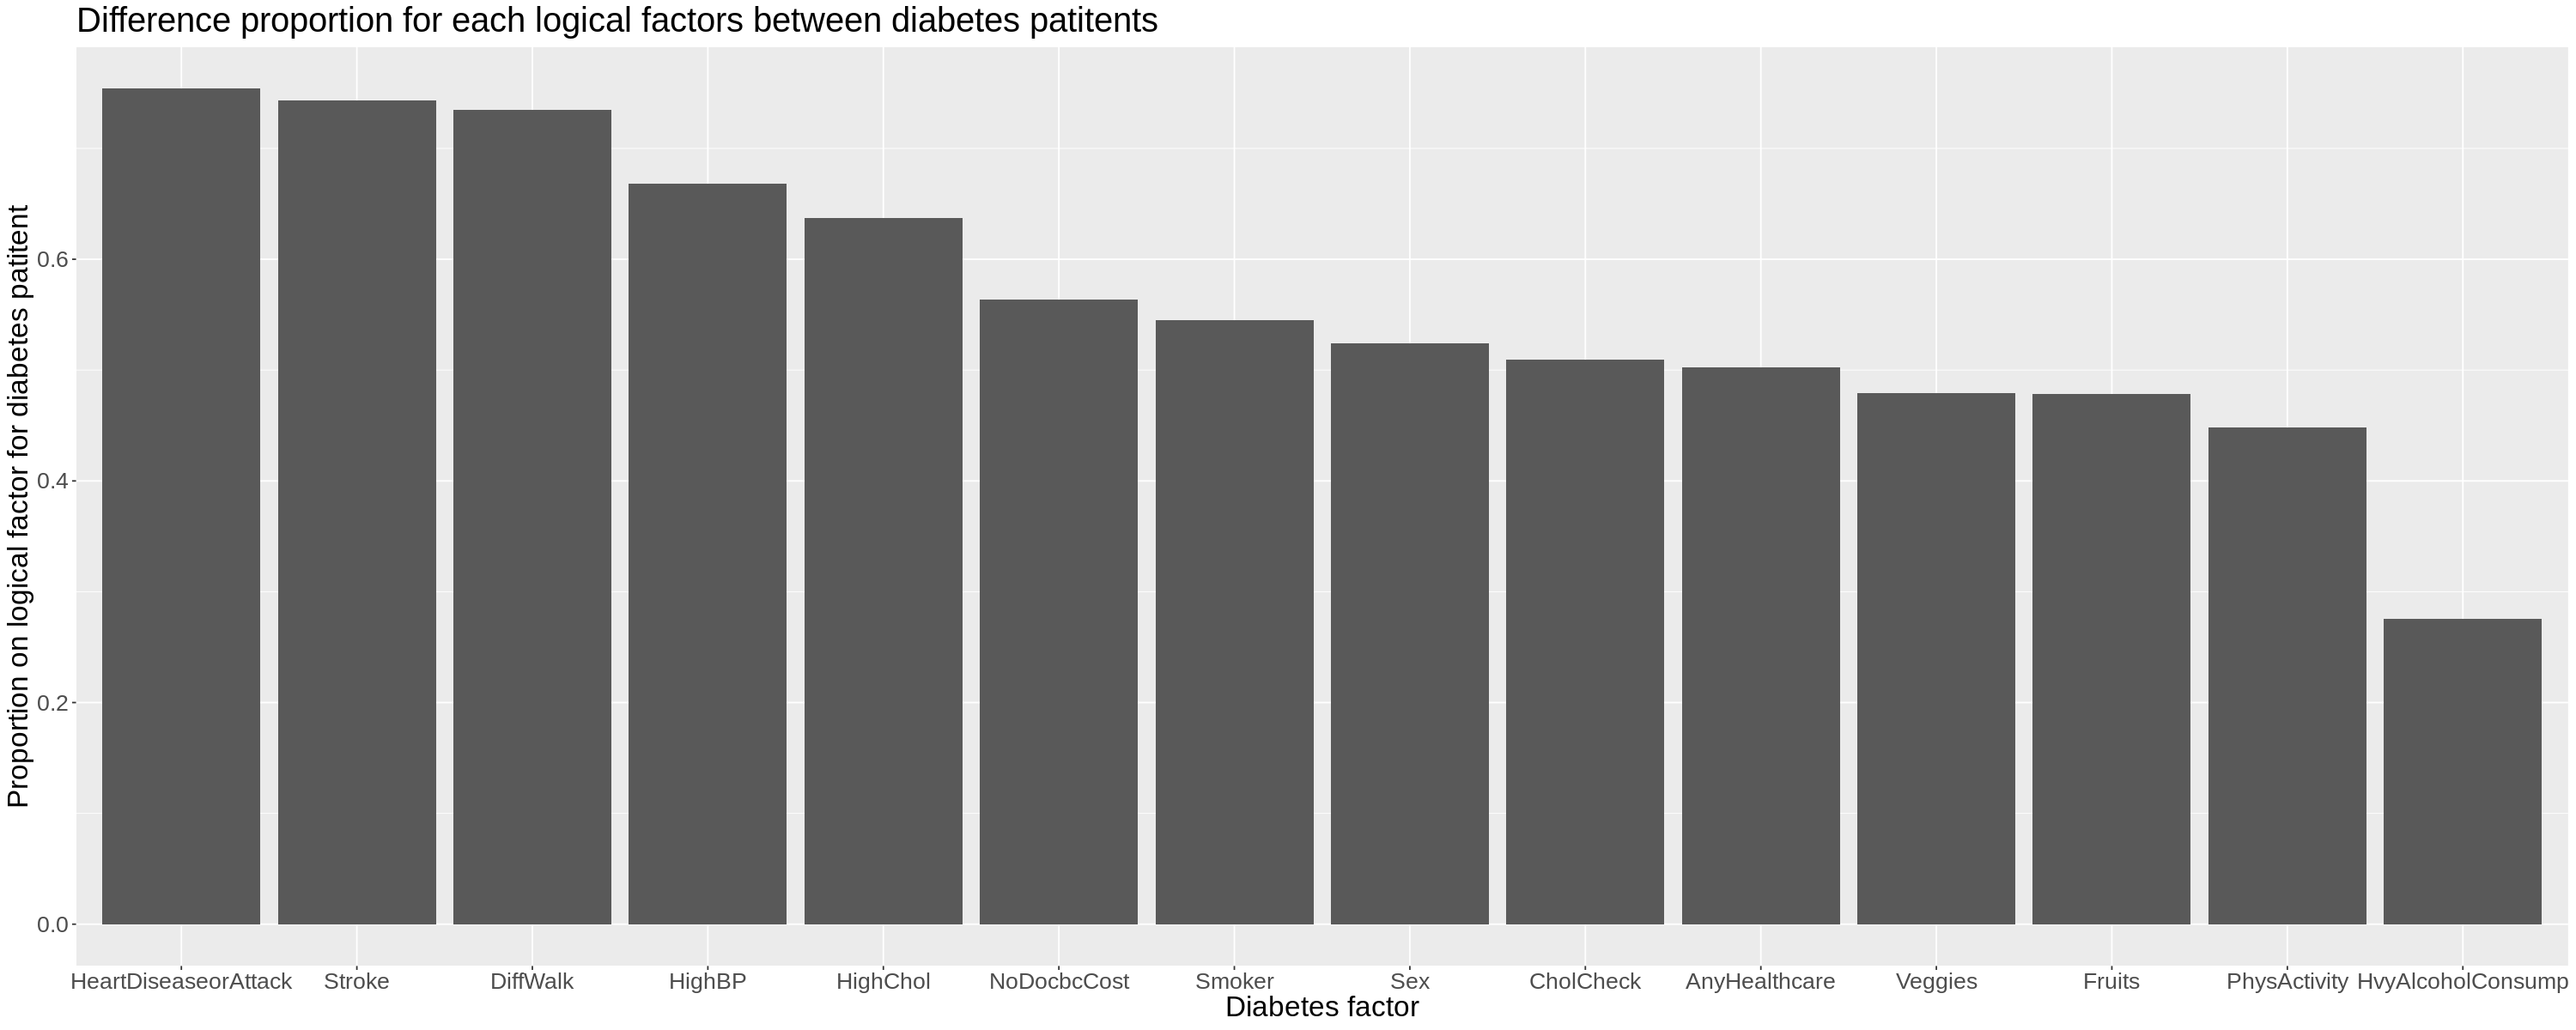

In [7]:
# use this new version
# the amount of diabetes and non diabetes patitent is the same, so the amount of each sympton means the prop
prop <- diabetes_logical_data |>
        group_by(Diabetes_binary) |>
        count()
prop

# comparing the prop/ammount of each factors in diabets and non-diabetes.
non_diabetes_subset <- diabetes_logical_data |>
       filter(Diabetes_binary == "0") |>
        summarize(across(Smoker:Fruits,sum, na.rm =TRUE)) |>
                pivot_longer(cols = Smoker:Fruits,
                     names_to = "logical_factor",
                     values_to = "logical_value") 

com_logical_factor <- left_join(non_diabetes_subset,diabetes_subset,by = "logical_factor")|>
mutate(number_non_diabetes = logical_value.x)|>
mutate(number_diabetes = logical_value.y) |>
select(logical_factor, number_non_diabetes, number_diabetes) |>
mutate(total = number_diabetes + number_non_diabetes) |>
mutate(diabetes_prop = number_diabetes/total)

com_logical_factor 

options(repr.plot.width = 25, repr.plot.height = 10)
# make a bar chart with proportion of diabetes and non diabetes patitent
diabetes_diff <- ggplot(com_logical_factor, aes(x = fct_reorder(logical_factor,diabetes_prop, .desc = TRUE),
                                                   y = diabetes_prop))+
        geom_bar(stat = "identity") +
        labs(x = "Diabetes factor", y = "Proportion on logical factor for diabetes patitent") +
        ggtitle("Difference proportion for each logical factors between diabetes patitents")+
        theme(text = element_text(size = 20))
diabetes_diff 
# make a bar chart with proportion of diabetes and non diabetes patitent


As we saw from the bar plot,the proportion for HeartDiseaseorAttack, Stroke, and DiffWalk are higher than other factors for diabetes patitents. 
So we identify those 2 symptons are potential relevant predictors and add in our classifer model.

# Analysis and Visualization: histogram for numerical variables

Now we use the histogram to identify the numerical variables for diabetes and non-diabetes patients. Variables with significant different distribution for different labels could be identify as potential predictors in our case.


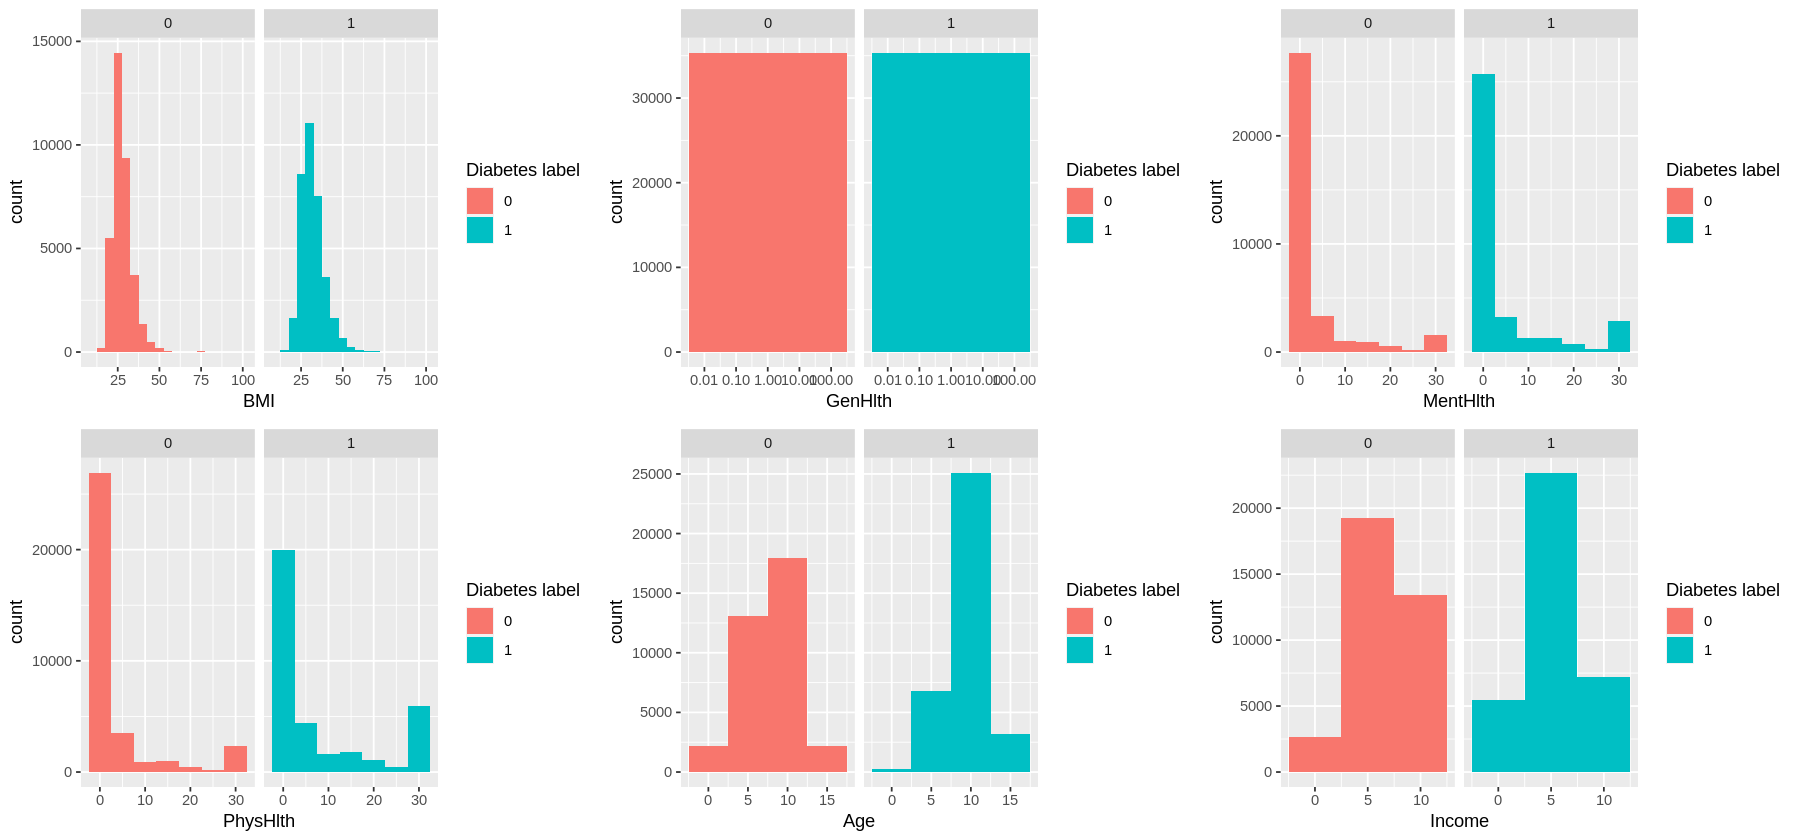

In [9]:
library(scales)

BMI_dis <- ggplot(diabetes_numerical_data, aes(x = BMI, fill = Diabetes_binary)) +
        geom_histogram(binwidth = 5) +
        facet_grid(cols = vars(Diabetes_binary)) +
        labs(x = "BMI", fill = "Diabetes label")

GenHlth_dis <- ggplot(diabetes_numerical_data, aes(x = GenHlth, fill = Diabetes_binary)) +
        geom_histogram(binwidth = 5) +
        facet_grid(cols = vars(Diabetes_binary)) +
        labs(x = "GenHlth", fill = "Diabetes label") +
        #theme(text = element_text(size = 12)) +
        scale_x_log10(labels = comma)
  
MentHlth_dis <- ggplot(diabetes_numerical_data, aes(x = MentHlth, fill = Diabetes_binary)) +
        geom_histogram(binwidth = 5) +
        facet_grid(cols = vars(Diabetes_binary)) +
        labs(x = "MentHlth", fill = "Diabetes label")

PhysHlth_dis <- ggplot(diabetes_numerical_data, aes(x = PhysHlth, fill = Diabetes_binary)) +
        geom_histogram(binwidth = 5) +
        facet_grid(cols = vars(Diabetes_binary)) +
        labs(x = "PhysHlth", fill = "Diabetes label")

Age_dis <- ggplot(diabetes_numerical_data, aes(x = Age, fill = Diabetes_binary)) +
        geom_histogram(binwidth = 5) +
        facet_grid(cols = vars(Diabetes_binary)) +
        labs(x = "Age", fill = "Diabetes label")

Income_dis <- ggplot(diabetes_numerical_data, aes(x = Income, fill = Diabetes_binary)) +
        geom_histogram(binwidth = 5) +
        facet_grid(cols = vars(Diabetes_binary)) +
        labs(x = "Income", fill = "Diabetes label")

options(repr.plot.width = 15, repr.plot.height = 7)
plot_grid(BMI_dis,GenHlth_dis,MentHlth_dis,
          PhysHlth_dis,Age_dis, Income_dis, ncol = 3) + ggtitle("Distribution for numerical factors with comparison")


Compared with six numerical variables distribution for diabetes and nondiabetes patients, we could identify BMI and Age as the potential predictors in our classifier since they have different distribution for diabetes and nondiabetes patients. Also, according to scientific knowledge, Age and BMI are the health index that reasonably impacts diabetes.

/// Need to do those to confirm final predictors you kept are reasonable:
1. Examine the data for patterns: Do the histograms and bar graphs reveal any obvious patterns or trends in the data? Is there any predictor that appears to be closely related to the outcome variable? >>> the intepret the visualization/done
2. Assume the following domain knowledge: Do the predictors you chose make sense in light of what you know about the problem and the data? Are there any additional predictors you believe should be considered? >>> based on our own knowledge/done
3. Examine the connections: Even if the correlation matrix code did not work in your Jupyter notebook, you may still use R's built-in correlation function to compute the correlations between the predictors and the outcome variable. Examine whether the predictors you choose have a high correlation with the result variable. >>> use code to evaluate? 

Now we get the clean dataset with relevant exploratory variables. Based on exploratory analysis, we identify the 2 numerical factors (BMI and Age), 3 logical factors(whether have HeartDiseaseorAttack, Stroke, DiffWalk) are the revelent variables that affect the diabetes pitients. 

In [12]:
# clean the cols with irrelevant variables
diabetes_clean <- diabetes_data |>
    mutate(Diabetes_binary = as.factor(Diabetes_binary)) |>
    select(BMI,Age,HeartDiseaseorAttack,Stroke,DiffWalk, Diabetes_binary)
slice(diabetes_clean,1:15)

BMI,Age,HeartDiseaseorAttack,Stroke,DiffWalk,Diabetes_binary
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
26,4,0,0,0,0
26,12,0,1,0,0
26,13,0,0,0,0
28,11,0,0,0,0
29,8,0,0,0,0
18,1,0,0,0,0
26,13,0,0,0,0
31,6,0,0,0,0
32,3,0,0,0,0


# Classification: Building a classifier and tuning the model

In this section, we used those variables to build a KNN classification model to answer a predictive questio: Given that a person with those relevant variables data, could we predict that he/she is a potential diabetes patient? To build this model and evaluate the quality, firstlt, we split the clean dataset into training and testing dataset with prop = 0.75

In [13]:
set.seed(1)
diabetes_split <- initial_split(diabetes_clean, prop =0.75, strata = Diabetes_binary) 
diabetes_train <-training(diabetes_split)
diabetes_test <-testing(diabetes_split)

#make more readable and show that our sub dataset already shuffle)
#should we show that the dataset is balanced and stra
slice(diabetes_train,1:10)
slice(diabetes_test,1:10)

BMI,Age,HeartDiseaseorAttack,Stroke,DiffWalk,Diabetes_binary
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
26,4,0,0,0,0
26,12,0,1,0,0
26,13,0,0,0,0
28,11,0,0,0,0
29,8,0,0,0,0
18,1,0,0,0,0
26,13,0,0,0,0
31,6,0,0,0,0
24,12,1,0,0,0


BMI,Age,HeartDiseaseorAttack,Stroke,DiffWalk,Diabetes_binary
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
32,3,0,0,0,0
27,6,0,0,0,0
27,7,0,0,0,0
18,10,0,0,0,0
22,6,0,0,0,0
29,10,0,0,0,0
22,8,0,0,0,0
28,8,0,0,0,0
24,4,0,0,1,0


In KNN classification model, we tune the model with cross-validation to pick the highest accuracy K.

In [36]:
# tuning and build the classifier by using cross-validation

set.seed(1)
diabetes_vfold <- vfold_cv(diabetes_train, v = 5, strata = Diabetes_binary)

diabetes_recipe <- recipe(Diabetes_binary ~ ., data =diabetes_train)  |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

kval = tibble(neighbors = seq(1:20))

knn_results <- workflow() |>
  add_recipe(diabetes_recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = diabetes_vfold, grid = kval) |>
  collect_metrics() |>
  filter(.metric == "accuracy")

knn_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.5441925,5,0.001172820,Preprocessor1_Model01
2,accuracy,binary,0.5395337,5,0.000852117,Preprocessor1_Model02
3,accuracy,binary,0.5603947,5,0.001770196,Preprocessor1_Model03
4,accuracy,binary,0.5581501,5,0.001743253,Preprocessor1_Model04
5,accuracy,binary,0.5755970,5,0.002011059,Preprocessor1_Model05
6,accuracy,binary,0.5735977,5,0.001979718,Preprocessor1_Model06
7,accuracy,binary,0.5868196,5,0.001844683,Preprocessor1_Model07
8,accuracy,binary,0.5861783,5,0.001830243,Preprocessor1_Model08
9,accuracy,binary,0.5956846,5,0.001172488,Preprocessor1_Model09


We can visualize the tendency of accuracy with different K with this dataset

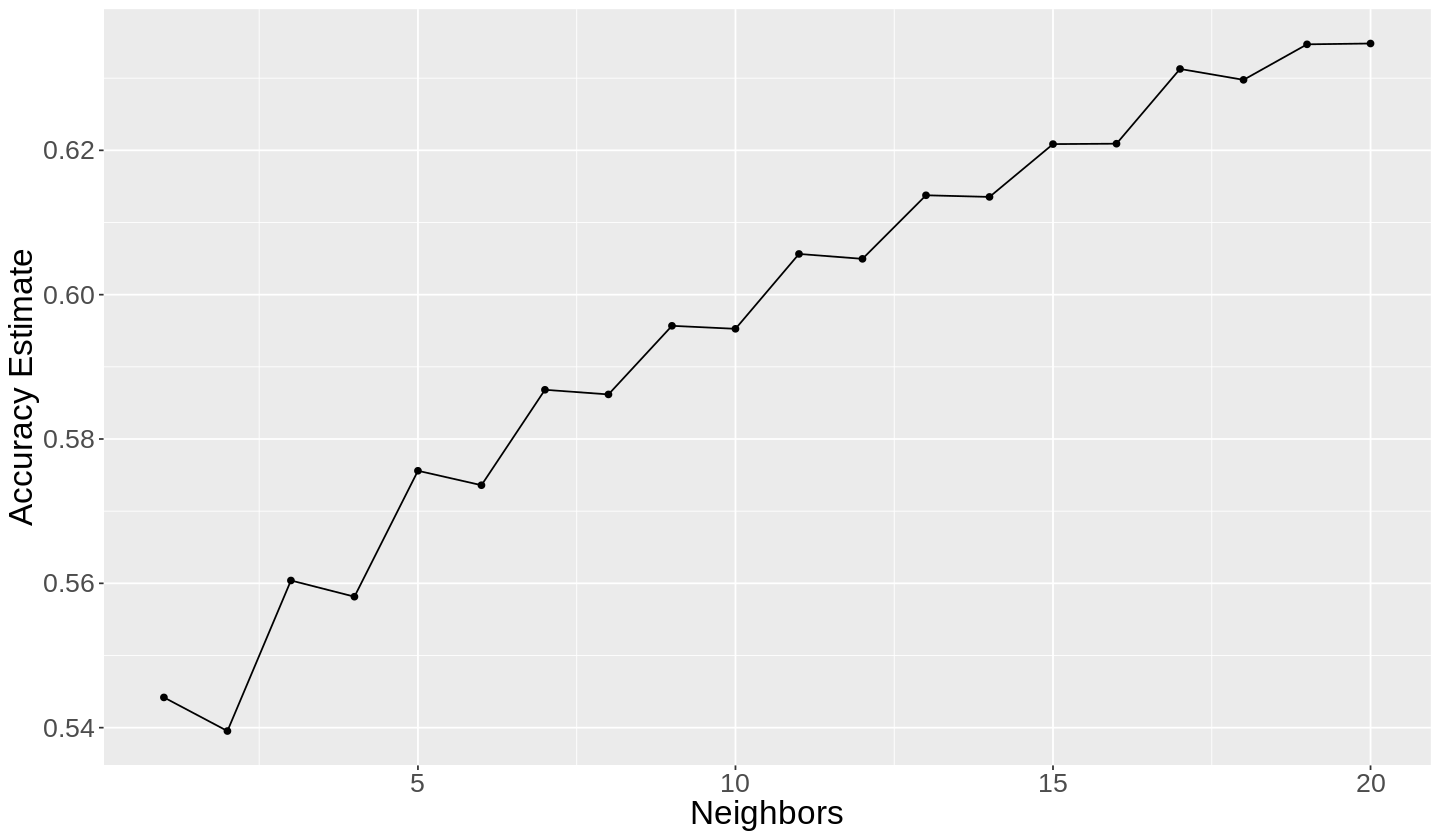

In [37]:
options(repr.plot.width = 12, repr.plot.height = 7)

# Plot k values against their respective accuracies and choose optimal k value
cross_val_plot <- knn_results |> 
    ggplot(aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Neighbors", y = "Accuracy Estimate") +
    theme(text = element_text(size = 20))

cross_val_plot

Then, we put the best fit K into our classifer. Although K = 20 or larger could reach higher accuracy, the increasement in K will cause the classifer slower and the accuracy doesn't increase significantly. Thus, we choose the K with relative high accuracy with higher efficiency. 

In [40]:
# using best accuracy K put into the classifier and train
knn_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 16) |>
  set_engine("kknn") |>
  set_mode("classification")

diabetes_fit <- workflow() |>
  add_recipe(diabetes_recipe) |>
  add_model(knn_best_spec) |>
  fit(data = diabetes_train)


In order to evaluate the quality of our model, we use testing dataset to predict the categories and calculate the accuracy result.

In [ ]:
# using test dataset to evaluate the quality of classifier, then interpret the result
# Get the prediction column
diabetes_predictions <- predict(diabetes_fit, diabetes_test) |> 
    bind_cols(diabetes_test)

# Compare the accuracy of predictions to the true values in the test set
diabetes_acc <- diabetes_predictions |> 
    metrics(truth = Diabetes_binary, estimate = .pred_class)  |>
    select(.metric, .estimate)|> 
    filter(.metric == "accuracy")

# Compare the predictions to the true values in a confusion matrix
diabetes_cm <- diabetes_predictions |> 
    conf_mat(truth = Diabetes_binary, estimate = .pred_class)
diabetes_acc

# Visualization for the classification
/// giving an example observation in test dataset. 
1. Firstly, puting observation in a two variable training data diagram (with label)
2. secondly, using classifier to identify the label, and using KNN algthorim to identify nearest label in the graph.


/// TA suggestion: Multivariable categorization visualization can be difficult. To illustrate the associations between the predictors and the outcome variable, one option is to use a scatterplot matrix or a pairplot. A heatmap can also be used to display the correlations between the predictors. To make the visualization more helpful, you can use different colours or shapes to represent different classes in your data.
Several sorts of charts can be used to illustrate data for datasets containing both logical and numerical predictors. For example, bar charts can be used to display logical forecasters while histograms can be used to visualize numerical predictors. You can also try combining charts to illustrate multiple classes, such as a scatterplot with different colours or shapes.

First, we visualize two numerical predictors: BMI and Age; we plot a scatter plot, age on x axis and BMI on y axis, fill the point with different color for diabetes and non-diabetes patitents. Throughout the scatterplot, we can visualize the KNN classification model.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



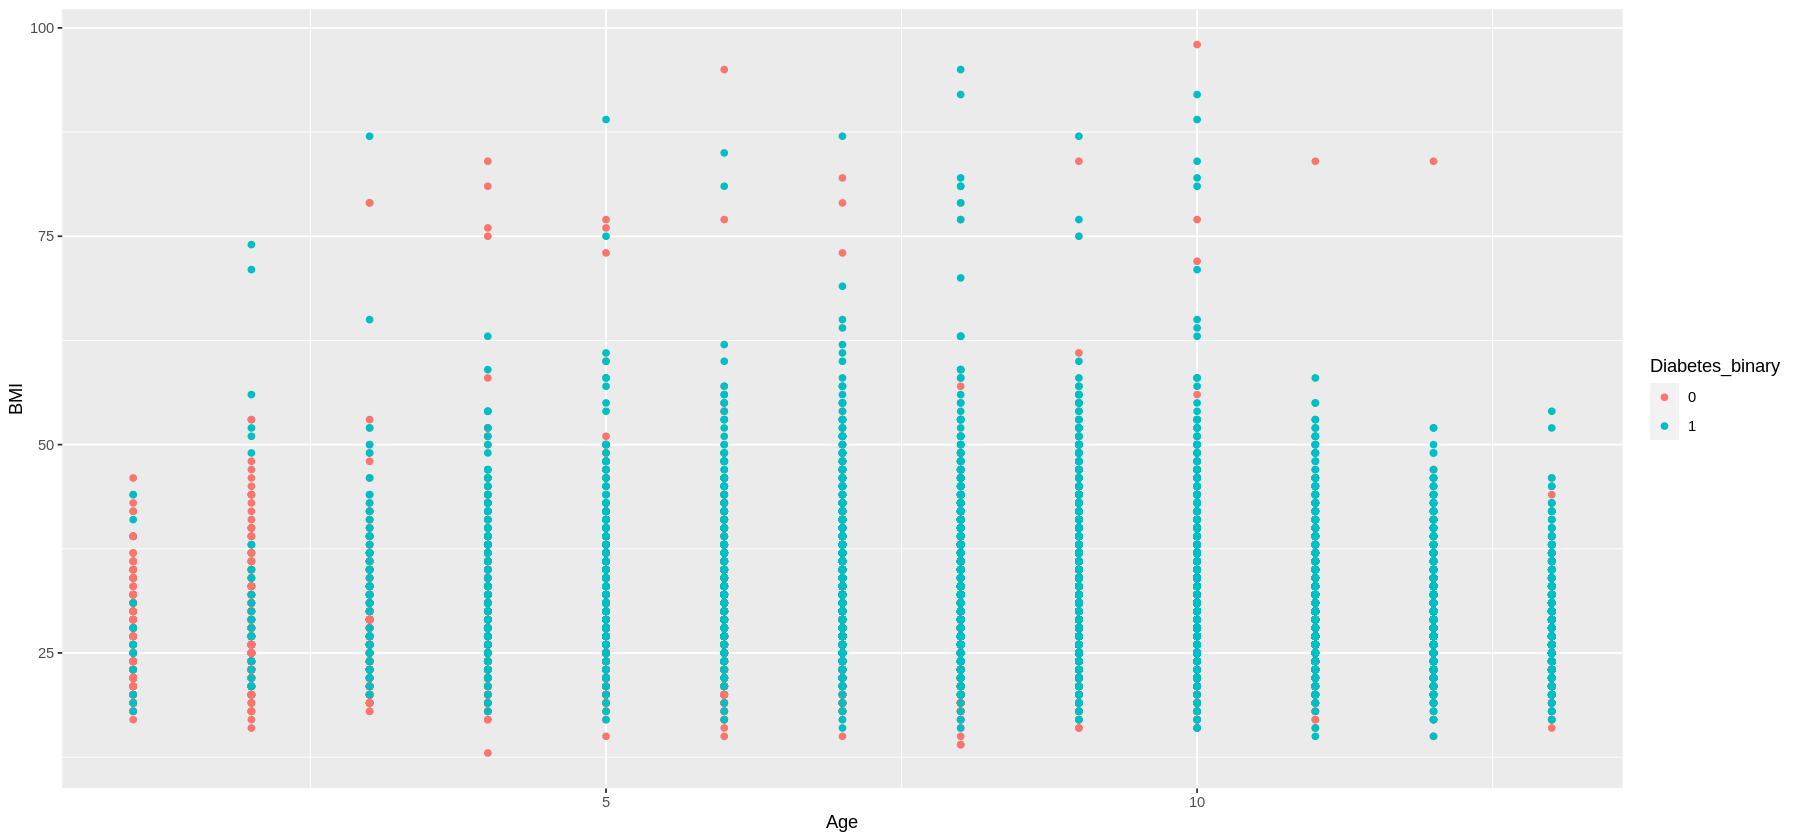

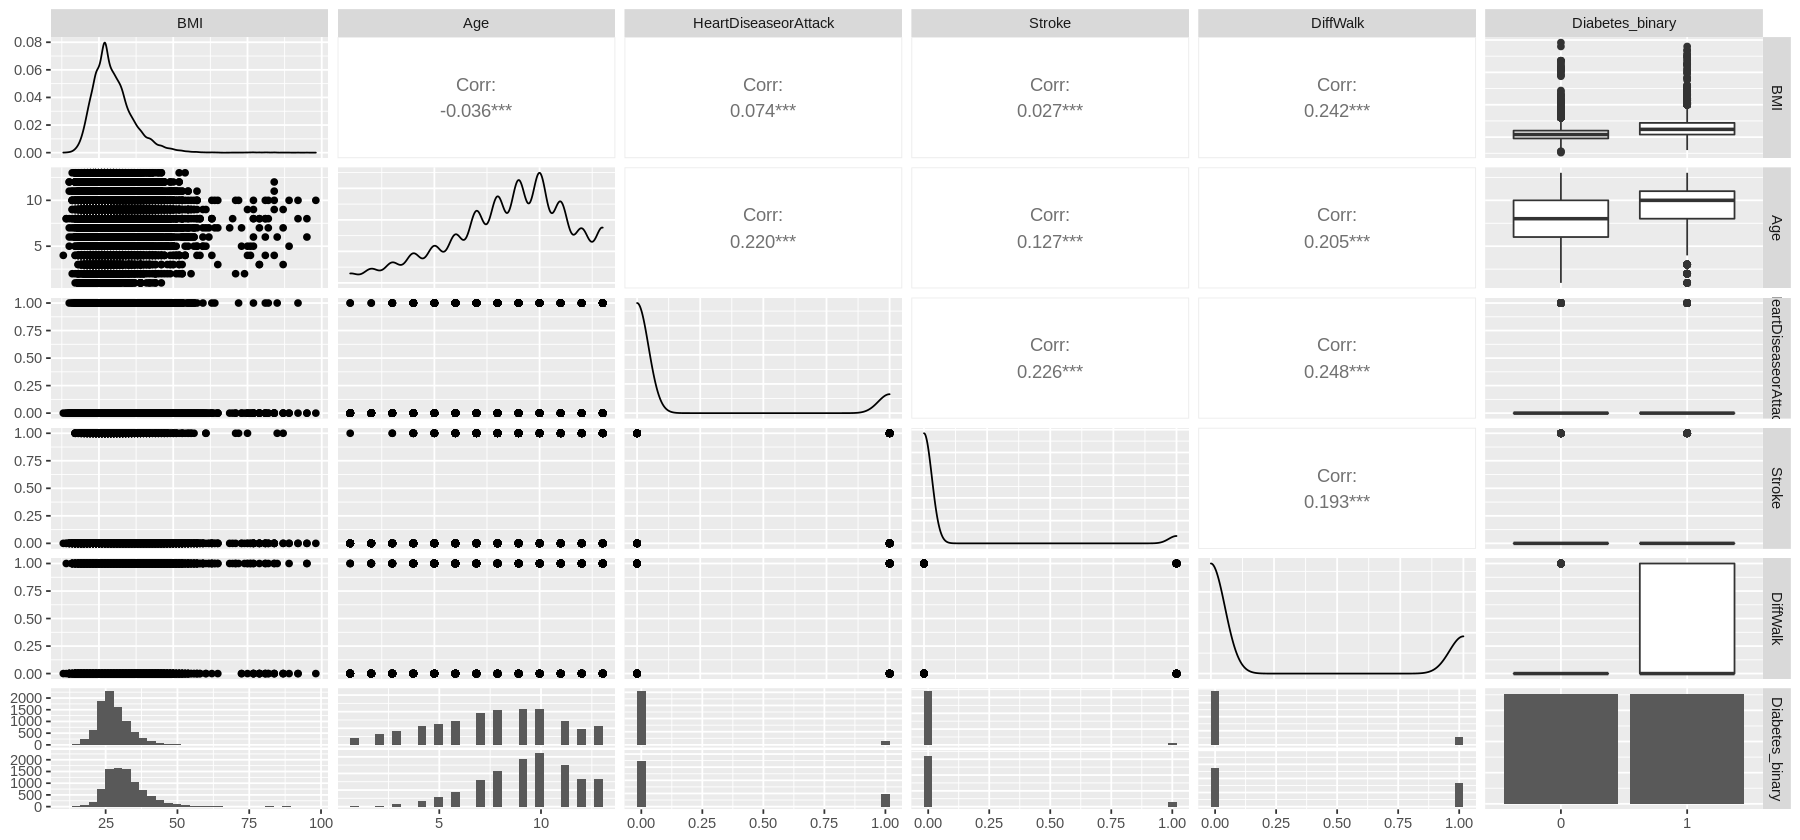

In [20]:
BMI_vs_Age <- ggplot(diabetes_test, aes(x = Age, y = BMI, color = Diabetes_binary)) +
geom_point() 
BMI_vs_Age
correlation_matrix <- ggpairs(diabetes_test)
correlation_matrix

#... how to intepret that...

In [29]:
#Create a heatmap of the correlations between variables in the mtcars dataset
?heatmap

library(corrplot)
# Compute correlation matrix
corr_mat <- cor(diabetes_data)

# Create a correlation plot
corrplot(corr_mat, type = "upper", order = "hclust",
tl.col = "black", tl.srt = 45, tl.cex = 0.7)

ERROR: Error in library(corrplot): there is no package called ‘corrplot’


# Discussion: 

    1. what you find?: from what: 
        classifier accuracy
        is predictors help to improve accuracy? ...
        
    2. different with expectation?
    3. impact of this finding?
    4. lead what further questions?: For instance, can a similar model be built for all such diseases which do not have outright physical indicators. If models can be built for predicting or classifying patients as healthy, at-risk and patient, then could a model be built for curing diabetes and similar diseases?

/// low accuracy problem should be discussed here

From Piazza: You won’t be marked for your predictor accuracy. Some datasets are too noisy and the course doesn’t teach you how to handle more complicated cases. You’ll be graded on your process and your analysis, so if you had a low classifier I’d highly recommend you discuss it in the context of you project. Why was it low? What do you think you can do to improve it? Saying general things like “It would have been better if we had more good predictors” is too general.